In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
import scipy.stats as st

# ANALYSIS OF REPAYING OF CREDITS

In [2]:
df=pd.read_csv('data (2).csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


df.columns

In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [7]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


In [9]:
df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

<AxesSubplot:title={'center':'AMT_CREDIT'}, xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

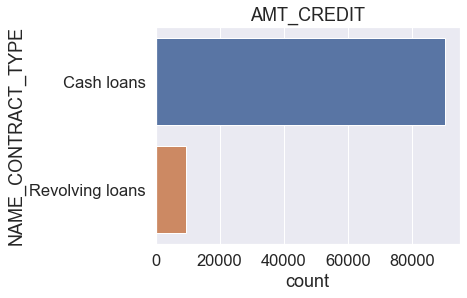

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("AMT_CREDIT")
sb.countplot(data=df,y="NAME_CONTRACT_TYPE")

#in this graph we can find that most the people has takken loan in cash form.

<AxesSubplot:title={'center':'OCCUPATION_TYPE'}, xlabel='AMT_INCOME_TOTAL', ylabel='NAME_FAMILY_STATUS'>

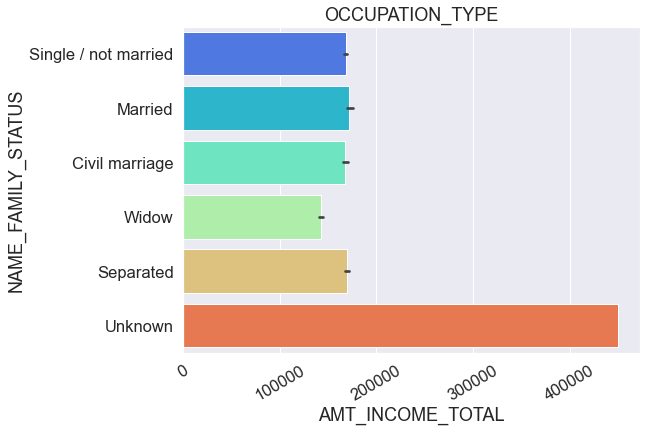

In [23]:
plt.figure(figsize=(18,6))
sb.set(font_scale=1.5)
plt.subplot(121)
plt.title("OCCUPATION_TYPE")
plt.xticks(rotation=30)
sb.barplot(data=df,x="AMT_INCOME_TOTAL",y="NAME_FAMILY_STATUS",palette="rainbow")

In [ ]:
#here we are able to find that total income amount moslty belong from unkmown family status comprateivly avg in known family status.

In [40]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

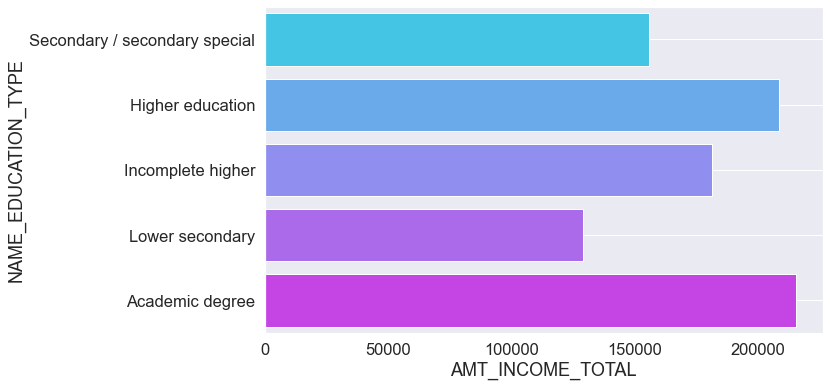

In [43]:
plt.figure(figsize=(10,6))
sb.barplot(data=df,y='NAME_EDUCATION_TYPE',x='AMT_INCOME_TOTAL',ci=False,palette='cool')
plt.grid()
plt.show()

In [ ]:
#in this graph we are able to know that income is distributed according to there qualification 

<AxesSubplot:title={'center':'DAYS_EMPLOYED'}, xlabel='count', ylabel='OCCUPATION_TYPE'>

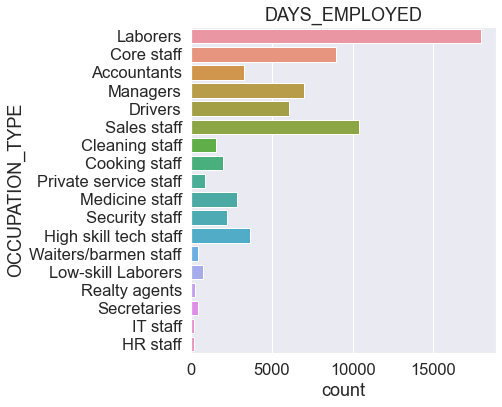

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("DAYS_EMPLOYED")
sb.countplot(data=df,y="OCCUPATION_TYPE")

In [ ]:
#here we came to conclusion that diffrent type of employess were have diffrent of work where laborers are employed for long days

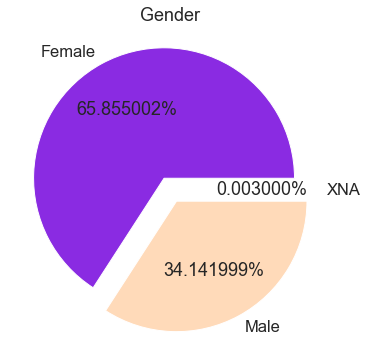

In [74]:
plt.figure(figsize=(18,6))
sb.set(font_scale=1.5)
plt.title('GENDER')
sb.countplot(data=df,x='GENDER',palette='cool')

plt.subplot(122)
c=df['GENDER'].value_counts()
lbl=['Female','Male','XNA']
plt.title('Gender')
plt.pie(c,labels=lbl,autopct='%2f%%',colors=['blueviolet','peachpuff','black'],explode=[0.1,0.1,0.1])
plt.show()

In [ ]:
#in this plot we find that male paticipant are leading in doc submission 

In [86]:
import warnings 
warnings.filterwarnings('ignore')

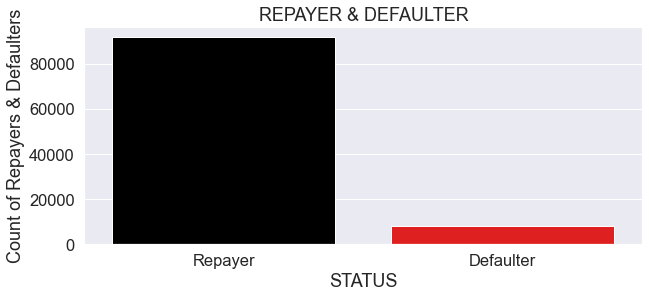

In [89]:
Imbalance = df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sb.barplot(x,"TARGET",data = Imbalance,palette= ['black','red'])
plt.xlabel("STATUS")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("REPAYER & DEFAULTER")
plt.show()

In [ ]:
#from the above graph we can easily find the diffrence between repayer and defaulter